# Parameter recovery of the DDM with starting point bias

In [1]:
import rlssm
import pandas as pd

## Simulate individual data

In [3]:
from rlssm.random import simulate_ddm

In [4]:
data = simulate_ddm(
    n_trials=400, 
    gen_drift=.8, 
    gen_threshold=1.3, 
    gen_ndt=.23, 
    gen_rel_sp=.6)

In [5]:
data.describe()[['rt', 'accuracy']]

,rt,accuracy
count,400.000000,400.000000
mean,0.564827,0.840000
std,0.285185,0.367065
min,0.261000,0.000000
25%,0.361750,1.000000
50%,0.476000,1.000000
75%,0.667000,1.000000
max,1.741000,1.000000


## Initialize the model

In [6]:
model = rlssm.DDModel(hierarchical_levels = 1, starting_point_bias=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ba90c9ff5918c4555b6b624f8591f02b NOW.


## Fit

In [7]:
# sampling parameters
n_iter = 3000
n_chains = 2
n_thin = 1

# bayesian model, change default priors:
drift_priors = {'mu':1, 'sd':3}
threshold_priors = {'mu':-1, 'sd':3}
ndt_priors = {'mu':-1, 'sd':1}

In [8]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    verbose = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 3000 iterations ended with a divergence (0.0%)
0 of 3000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### get Rhat

In [9]:
model_fit.rhat

,rhat,variable
0,0.999463,drift
1,0.999428,threshold
2,0.999969,ndt
3,0.999633,rel_sp


### calculate wAIC

In [11]:
model_fit.waic

{'lppd': -84.4165465344934,
 'p_waic': 3.631295141216568,
 'waic': 176.09568335141995,
 'waic_se': 48.46685345606353}

## Posteriors

In [12]:
model_fit.samples.describe()

,chain,draw,transf_drift,transf_threshold,transf_ndt,transf_rel_sp
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.500000,749.500000,0.880803,1.301814,0.234382,0.616586
std,0.500083,433.084792,0.112488,0.034720,0.004773,0.019893
min,0.000000,0.000000,0.513606,1.165148,0.215534,0.524463
25%,0.000000,374.750000,0.805302,1.278279,0.231489,0.603545
50%,0.500000,749.500000,0.884396,1.300699,0.234745,0.616995
75%,1.000000,1124.250000,0.957056,1.324780,0.237767,0.629993
max,1.000000,1499.000000,1.270829,1.414547,0.247698,0.687491


In [13]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

Here we plot the estimated posterior distributions against the generating parameters, to see whether the model parameters are recovering well:

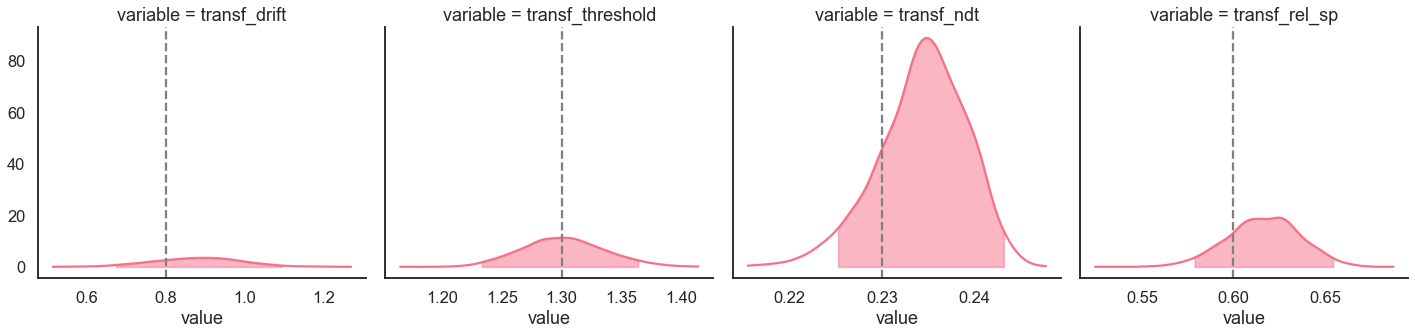

In [14]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

for i, ax in enumerate(g.axes.flatten()):
    ax.axvline(data[['drift', 'threshold', 'ndt', 'rel_sp']].mean().values[i], color='grey', linestyle='--')